# Install / import required libs

In [ ]:
!pip install fastai

In [ ]:
!python --version

Python 3.7.10


In [ ]:
pip install torch

In [ ]:
import fastai
from fastai.text import *
from sklearn.model_selection import train_test_split

In [ ]:
# specify GPU
import torch
print(torch.__version__)
device = torch.device("cuda")

1.8.1+cu101


In [ ]:
 !nvidia-smi

Fri Jun  4 20:10:04 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8    11W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------



*  Dataset Referece: Language  Model Dataset Reference: Chakrabarty, Tuhin, Christopher Hidey, and Kathleen McKeown. "IMHO fine-tuning improves claim detection." arXiv preprint arXiv:1905.07000 (2019). 



* Research Paper Link: https://www.aclweb.org/anthology/N19-1054


# Load Classfier Data

In [ ]:
def load_classifier_data(data_path):
    texts  = []
    labels = [] 
    for line in open(data_path, encoding='utf-8'):

        text_label = line.strip().split('\t')
        if len(text_label) > 1:
            texts.append(text_label[0])
            labels.append(int(text_label[1]))
    
    df = pd.DataFrame({'text':texts, 'labels':labels}, columns=['labels','text'])
    df['text'] = df['text'].apply(lambda x: fixup(x))
    
    # df_trn, df_val = train_test_split(df, test_size=0.1)
    
    
    return df

In [ ]:
# data_path ="/content/drive/MyDrive/arg_mining/imho_comments.txt"
data_path_class = "/content/drive/MyDrive/arg_mining/claimnonclaim.txt"
model_path = "/content/drive/MyDrive/SeverDataOld"
model_path = "/content/drive/MyDrive/arg_mining/"

In [ ]:
data_lm = torch.load('/content/drive/MyDrive/arg_mining/data_lm')

/usr/local/lib/python3.7/dist-packages/torch/serialization.py:656: SourceChangeWarning: source code of class 'torch.nn.modules.loss.CrossEntropyLoss' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [ ]:
data_lm

LabelLists;

Train: LabelList (4790294 items)
x: LMTextList
xxbos xxmaj best titles outside that are xxmaj lando ( great heist mini series ) and xxup c3po one shot is awesome .,xxbos ( this is the hardest part of a base to design ) .,xxbos i d ( xxup pk ),xxbos i d suggest listening to xxmaj the xxmaj unseen and xxmaj further adventures first , just because they are much better than xxmaj xxunk xxmaj whatever ( still good album though ),xxbos xxmaj the problem with xxmaj spore , is that it was billed as an evolution simulator , when in fact it was an xxmaj intelligent xxmaj design simulator .
y: LMLabelList
,,,,
Path: /workspace/ceph_data/belief-based-argumentation-generation/models/arg_mining;

Valid: LabelList (532255 items)
x: LMTextList
xxbos xxmaj it would be easier to use other keys in software because you would n't have to worry about reverting the toggle after specific key combos , but that would n't itself be enough of a reason .,xxbos 3 nights in a city is a good short stop ,

In [ ]:
data_lm.train.vocab


In [ ]:
model_path ="/content/drive/MyDrive/arg_mining"

In [ ]:
def load_classifier_dataframe(data_path):
    texts  = []
    labels = [] 
    for line in open(data_path, encoding='utf-8'):

        text_label = line.strip().split('\t')
        if len(text_label) > 1:
            texts.append(text_label[0])
            labels.append(int(text_label[1]))
    
    df = pd.DataFrame({'text':texts, 'labels':labels}, columns=['labels','text'])
    df['text'] = df['text'].apply(lambda x: fixup(x))
    return df
import re

re1 = re.compile(r'  +')

def fixup(x):
    x = x.replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>','u_n').replace(' @.@ ','.').replace(
        ' @-@ ','-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x))

#1. Train  test , val split on dataset

In [ ]:
df_claims = load_classifier_dataframe(data_path_class)
df_claims_Train,df_claims_test = train_test_split(df_claims,test_size =0.1,random_state=0)
df_claims_train,df_claims_val = train_test_split(df_claims_Train,test_size =0.1,random_state=0)

## Load Dataloader of the previousily trained LM data_lm

# Train classfier

In [ ]:
# Train classifer on train_test_split

In [ ]:
data_clas = TextClasDataBunch.from_df(path = model_path, train_df = df_claims_train, 
    valid_df = df_claims_val, vocab=data_lm.vocab, bs=32)

learn = text_classifier_learner(data_clas, arch=AWD_LSTM, drop_mult=0.7)
learn.load_encoder('ft_enc')
learn.freeze_to(-1)

learn.fit_one_cycle(1, 1e-2)

#learn.save('lm_last_ft')
#learn.load('lm_last_ft')



/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


epoch,train_loss,valid_loss,accuracy,time
0,0.659993,0.581567,0.724138,00:02


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(10, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.625310,0.565312,0.749216,00:06
1,0.596151,0.541672,0.733542,00:06
2,0.562236,0.550943,0.683386,00:06
3,0.490853,0.519428,0.730408,00:06
4,0.404006,0.577937,0.736677,00:06
5,0.293345,0.639736,0.739812,00:06
6,0.216769,0.616108,0.736677,00:06
7,0.159721,0.657733,0.733542,00:06
8,0.132679,0.691998,0.739812,00:06
9,0.121460,0.654821,0.768025,00:06


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ar

In [ ]:
learn.save('claims_ft_awd_lstm')

In [ ]:
learn.load('claims_ft_awd_lstm')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (2864 items)
x: TextList
xxbos xxmaj especially if there is more pain or dull moments than pleasure in life,xxbos the only people available to sell to are the workers , who 's total funds are £ 500,xxbos xxmaj there are .,xxbos ' 1.1 .,xxbos i also do n't think that the connection between poor education tactics and the xxunk do n't think too much xxunk mentalities can be drawn between the zeitgeist claims you 're making
y: CategoryList
0,0,1,0,0
Path: /content/drive/MyDrive/arg_mining;

Valid: LabelList (319 items)
x: TextList
xxbos xxmaj make major changes and instead of xxmaj person a hating the series and xxmaj person b loving it , now xxmaj person a loves it and xxmaj person b hates it .,xxbos xxmaj as for the “ xxmaj they xxunk not risking their lives for our country . ” argument , police officers do that too , and for citizens rather than the country and its interests .,xxbos xxunk xxmaj well we have many examples in history wh

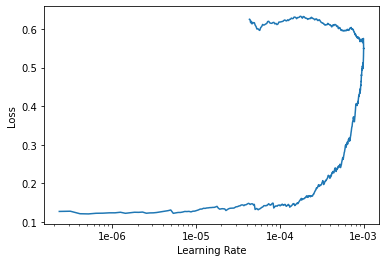

In [ ]:
learn.recorder.plot()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def classfiers_evaluation(actual_labels , predicted_labels):
    print(confusion_matrix(actual_labels , predicted_labels))
    print('Classification Report')
    print(classification_report(actual_labels , predicted_labels))
    print("Accuracy")
    print(accuracy_score(actual_labels , predicted_labels))

# Prediction on validation data

In [ ]:
text_list =  ["In 2011 there were about 730,322 abortions reported to the centers for disease control.",
      "There are about 1.7% of abortion of women's ages from 15-44 each year.",
      "Women who already had abortion earlier in there life time have abortion again.",
      "At the age of 45 a women will have at least one abortion.",
      "By the 12th week of pregnancies 88.7% of women have abortion.",
      "In the U.S. black women are 3.3 times likely to have an abortion than white women."]

In [ ]:
# validation accuracy
preds, targets = learn.get_preds()

predictions = np.argmax(preds, axis = 1)

pd.crosstab(predictions, targets)
classfiers_evaluation(actual_labels=targets, predicted_labels=predictions)

[[178  44]
 [ 30  67]]
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       222
           1       0.60      0.69      0.64        97

    accuracy                           0.77       319
   macro avg       0.73      0.75      0.74       319
weighted avg       0.78      0.77      0.77       319

Accuracy
0.768025078369906


In [ ]:
learn.fit_one_cycle(1, 2e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.651873,0.627087,0.695925,00:06


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
learn.freeze_to(-2)
learn.fit_one_cycle(1,  slice(1e-2/(2.6**4),1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.661625,0.649523,0.695925,00:03


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.651498,0.624674,0.695925,00:04


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.658658,0.633358,0.695925,00:06
1,0.651751,0.618700,0.695925,00:06


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ar

In [ ]:
test_data =df_claims_test.text

In [ ]:
# # test set accuracy
# preds = learn.get_preds(test_data.to_list())
# pred_labels = preds.numpy()
# pred_labels

In [ ]:
len(preds[0])

2

In [ ]:
## Return predicted class label and probabilities for `item`."
def predict_awd_lstm(text_list):
  pred_class_list =[]
  pred_list =[]
  pred_probability_list = []
  for text in text_list:
    pred=learn.predict(text)
    pred_list.append(pred)
    pred_class_list.append(pred[1].numpy().tolist())
    pred_probability_list.append(pred[2].numpy()[1])
  
  return pred_class_list,pred_probability_list

# Prediction on test set

In [ ]:
pred_class_list,pred_probability_list = predict_awd_lstm(test_data)

In [ ]:
len(pred_probability_list)

354

In [ ]:
pred_class_list[0:5]

[0, 0, 1, 1, 0]

In [ ]:
classfiers_evaluation(actual_labels=df_claims_test.labels , predicted_labels=pred_class_list)

[[186  48]
 [ 45  75]]
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       234
           1       0.61      0.62      0.62       120

    accuracy                           0.74       354
   macro avg       0.71      0.71      0.71       354
weighted avg       0.74      0.74      0.74       354

Accuracy
0.7372881355932204


In [ ]:
data_clas.show_batch(2)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


text,target
"xxbos xxmaj so reddit , why do people post nudes ? i seriously ca n't grasp the concept in a way that justifies this action , and have come into conflict with female friends and my gf and would like to be able to see this from another angle . xxmaj thanks in advance . xxup edit : xxmaj thank you for all of the replies ! xxmaj you guys",0
xxbos xxmaj well how can you expect young people who have n't experienced being old to make informed voting decisions regarding retirement ? xxmaj you could say that young people will vote in interests of creating the best xxunk because they will some day retire but do you really expect people to prioritizes decades in the future over the short term ? xxunk xxmaj should young adults with trust funds,0


In [ ]:
data_clas.save('data_classifier_claims')


In [ ]:
pred_class_list[0:5]

[0, 0, 1, 1, 0]

In [ ]:
df_claims_test['text'][0:5]

3460    The Nativity scene is about the visit of the s...
3499                                            Education
2000                            It's iconic in its genre.
2363    I think not! you need to expand your perspecti...
2066    someone who assists another country that is in...
Name: text, dtype: object

# Prediction on Snippets Data

In [ ]:
sentences_file_path ="/content/drive/MyDrive/arg_mining/snippets_sentences.txt"

In [ ]:
with open (sentences_file_path, encoding="utf-8" ) as f:
    snippets_sentences = f.read().splitlines()

In [ ]:
snippets_sentences=snippets_sentences[0:9]

In [ ]:
snippets_sentences_clean = [fixup(x) for x in snippets_sentences]

In [ ]:
snippets_sentences_clean[0:8]

['In 2011 there were about 730,322 abortions reported to the centers for disease control.',
 "There are about 1.7% of abortion of women's ages from 15-44 each year.",
 'Women who already had abortion earlier in there life time have abortion again.',
 'At the age of 45 a women will have at least one abortion.',
 'By the 12th week of pregnancies 88.7% of women have abortion.',
 'In the U.S. black women are 3.3 times likely to have an abortion than white women.',
 'Abortion is wrong!',
 'Abortion Is gross!']

In [ ]:
## Return predicted class, label and probabilities for `item`."
pred_class_list_snippets,pred_probability_list_snippets = predict_awd_lstm(snippets_sentences_clean)


In [ ]:

pred_probability_list_snippets

[0.032981247,
 0.66448534,
 0.8172054,
 0.038531397,
 0.035711084,
 0.91830957,
 0.9637317,
 0.84936565,
 0.54055184]

In [ ]:
pred_class_list_snippets[0:9]
#len(pred_class_list_snippets)

[0, 1, 1, 0, 0, 1, 1, 1, 1]

In [ ]:
len(pred_probability_list_snippets)

9

In [ ]:
import pandas as pd
claims_prediction_snippets_sentences_test = pd.DataFrame(
    {'Text': snippets_sentences,
     'Predicted_labels(awd_lstm:lm)': pred_class_list_snippets,
     'Probability(awd_lstm_:lm)'         : pred_probability_list_snippets    })


In [ ]:
claims_prediction_snippets_sentences_test

,Text,Predicted_labels(awd_lstm:lm),Probability(awd_lstm_:lm)
0,"In 2011 there were about 730,322 abortions rep...",0,0.032981
1,There are about 1.7% of abortion of women's ag...,1,0.664485
2,Women who already had abortion earlier in ther...,1,0.817205
3,At the age of 45 a women will have at least on...,0,0.038531
4,By the 12th week of pregnancies 88.7% of women...,0,0.035711
5,In the U.S. black women are 3.3 times likely t...,1,0.918310
6,Abortion is wrong!,1,0.963732
7,Abortion Is gross!,1,0.849366
8,Abortion is MURDER!!!!,1,0.540552


In [ ]:
sentences_csv_file_path ="/content/drive/MyDrive/arg_mining/snippets_sentences_prediction.csv"

In [ ]:
claims_prediction_snippets_sentences_test.to_csv(sentences_csv_file_path)


# Training in whole datasets and save the models

In [ ]:
df_claims_train,df_claims_val= train_test_split(df_claims,test_size =0.2,random_state=24)

In [ ]:
data_clas = TextClasDataBunch.from_df(path = model_path, train_df = df_claims_train, valid_df = df_claims_val, 
                                      vocab=data_lm.vocab, bs=64)

learn2 = text_classifier_learner(data_clas, arch=AWD_LSTM, drop_mult=0.7)
learn2.load_encoder('ft_enc')

learn2.freeze_to(-1)
learn2.fit_one_cycle(1, 1e-2)

learn2.save('lm_claims_ft_v1Colab')
learn2.load('lm_claims_ft_v1Colab')

learn2.unfreeze()
learn2.fit_one_cycle(10, 1e-3)

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


epoch,train_loss,valid_loss,accuracy,time
0,0.683802,0.611248,0.680791,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.624876,0.591007,0.693503,00:05
1,0.606502,0.585965,0.694915,00:05
2,0.604699,0.600660,0.663842,00:05
3,0.562653,0.588543,0.675141,00:05
4,0.510966,0.673109,0.629943,00:05
5,0.461931,0.576640,0.718927,00:05
6,0.418724,0.588403,0.718927,00:05
7,0.370875,0.591508,0.710452,00:05
8,0.329244,0.620968,0.707627,00:05
9,0.293807,0.617522,0.707627,00:05


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ar

In [ ]:
model_path

'/content/drive/MyDrive/arg_mining'

In [ ]:
## Return predicted class label and probabilities for `item`."
def predict_awd_lstm2(text_list):
  pred_class_list =[]
  pred_list =[]
  pred_probability_list = []
  for text in text_list:
    pred=learn2.predict(text)
    pred_list.append(pred)
    pred_class_list.append(pred[1].numpy().tolist())
    pred_probability_list.append(pred[2].numpy()[1])
  
  return pred_class_list,pred_probability_list

In [ ]:
pred_class_list,pred_probability_list = predict_awd_lstm2(snippets_sentences_clean)

In [ ]:
pred_probability_list

[0.07429149,
 0.40912053,
 0.35493886,
 0.026073663,
 0.08076222,
 0.18705942,
 0.6262533,
 0.76709414,
 0.5240098]

In [ ]:
pred_class_list,pred_probability_list = predict_awd_lstm(snippets_sentences_clean)

In [ ]:
pred_probability_list

[0.032981247,
 0.66448534,
 0.8172054,
 0.038531397,
 0.035711084,
 0.91830957,
 0.9637317,
 0.84936565,
 0.54055184]

In [ ]:
snippets_sentences_clean

['In 2011 there were about 730,322 abortions reported to the centers for disease control.',
 "There are about 1.7% of abortion of women's ages from 15-44 each year.",
 'Women who already had abortion earlier in there life time have abortion again.',
 'At the age of 45 a women will have at least one abortion.',
 'By the 12th week of pregnancies 88.7% of women have abortion.',
 'In the U.S. black women are 3.3 times likely to have an abortion than white women.',
 'Abortion is wrong!',
 'Abortion Is gross!',
 'Abortion is MURDER!!!!']

In [ ]:
learn2.export()